# Import Necessary Modules/Packages

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
# try to run this code if the plot doesn't show up
import plotly.offline as po
po.init_notebook_mode(connected=True)

# show all column dataframe
pd.set_option('display.max_columns', None)

# Data Cleaning

There are 2 scenarios that I will do here.

1st scenario:
1. [Read the dataset](#read-data)
2. [Finding Correlation Between Column](#find-corr)
3. [Handling missing data](#miss-data-1)
4. [Handling outliers](#outliers-1)

2nd scenario:
1. [Read the dataset](#read-data)
2. [Finding Correlation Between Column](#find-corr)
3. [Handling outliers](#outliers-2)
4. [Handling missing data](#miss-data-2)

The difference is I just switching the step 3 and 4 between the 1st and 2nd scenario. I will only do step 1 and 2 once, and will do scenario 1 first and then scenario 2.

<a id="read-data"></a>
## Read The Dataset

What we will going to do here are:
- Read the data outline
- Read dataframe's informations
- Find how many unique values on each column
- Check how many missing values on each column

In [3]:
FILE_PATH = '../input/da-training-program-datasets/cancer patient data sets.xlsx'

# read file into a dataframe
df = pd.read_excel(FILE_PATH)
df

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1  33.0     1.0            2.0          4.0           5.0   
1          P10  17.0     1.0            3.0          1.0           5.0   
2         P100  35.0     1.0            4.0          5.0           6.0   
3        P1000  37.0     1.0            7.0          7.0           7.0   
4         P101  46.0     1.0            6.0          8.0           7.0   
..         ...   ...     ...            ...          ...           ...   
995       P995  44.0     1.0            6.0          7.0           7.0   
996       P996  37.0     2.0            6.0          8.0           7.0   
997       P997  25.0     2.0            4.0          5.0           6.0   
998       P998  18.0     2.0            6.0          8.0           7.0   
999       P999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4.0           3.0                     2            2.0   
1                     3.0           4.0                     2            2.0   
2                     5.0           5.0                     4            6.0   
3                     7.0           6.0                     7            7.0   
4                     7.0           7.0                     6            7.0   
..                    ...           ...                   ...            ...   
995                   7.0           7.0                     6            7.0   
996                   7.0           7.0                     6            7.0   
997                   5.0           5.0                     4            6.0   
998                   7.0           7.0                     6            7.0   
999                   5.0           5.0                     4            6.0   

     Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4.0      3.0             2.0         2.0                4.0      3.0   
1        2.0      2.0             4.0         2.0                3.0      1.0   
2        7.0      2.0             3.0         4.0                8.0      8.0   
3        7.0      7.0             7.0         7.0                8.0      4.0   
4        7.0      8.0             7.0         7.0                9.0      3.0   
..       ...      ...             ...         ...                ...      ...   
995      7.0      7.0             8.0         7.0                7.0      5.0   
996      7.0      7.0             8.0         7.0                7.0      9.0   
997      7.0      2.0             3.0         4.0                8.0      8.0   
998      7.0      8.0             7.0         7.0                9.0      3.0   
999      7.0      2.0             3.0         4.0                8.0      8.0   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4.0                  2.0       2.0                    3.0   
1            3.0                  7.0       8.0                    6.0   
2            7.0                  9.0       2.0                    1.0   
3            2.0                  3.0       1.0                    4.0   
4            NaN                  4.0       1.0                    4.0   
..           ...                  ...       ...                    ...   
995          3.0                  2.0       7.0                    8.0   
996          6.0                  5.0       7.0                    2.0   
997          7.0                  9.0       2.0                    1.0   
998          2.0                  4.0       1.0                    4.0   
999          7.0                  9.0       2.0                    1.0   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1.0            2.0          3        4     Low  
1                         2.0            1.0          7        2  Medium  
2                         4.0            6.0          7        2   

In [4]:
# check dataframe informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       997 non-null    float64
 2   Gender                    994 non-null    float64
 3   Air Pollution             991 non-null    float64
 4   Alcohol use               988 non-null    float64
 5   Dust Allergy              993 non-null    float64
 6   OccuPational Hazards      994 non-null    float64
 7   Genetic Risk              994 non-null    float64
 8   chronic Lung Disease      1000 non-null   int64  
 9   Balanced Diet             995 non-null    float64
 10  Obesity                   992 non-null    float64
 11  Smoking                   993 non-null    float64
 12  Passive Smoker            996 non-null    float64
 13  Chest Pain                992 non-null    float64
 14  Coughing 

In [5]:
# find how many unique value in each column
# make sure the data on Patient Id are unique to each other
df.nunique()

Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   9
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  8
Obesity                        7
Smoking                        8
Passive Smoker                 9
Chest Pain                     9
Coughing of Blood              9
Fatigue                        9
Weight Loss                   10
Shortness of Breath            8
Wheezing                       9
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [6]:
# check how many missing value on each column
df.isna().sum()

Patient Id                   0
Age                          3
Gender                       6
Air Pollution                9
Alcohol use                 12
Dust Allergy                 7
OccuPational Hazards         6
Genetic Risk                 6
chronic Lung Disease         0
Balanced Diet                5
Obesity                      8
Smoking                      7
Passive Smoker               4
Chest Pain                   8
Coughing of Blood           13
Fatigue                      5
Weight Loss                  5
Shortness of Breath         10
Wheezing                     6
Swallowing Difficulty        7
Clubbing of Finger Nails     4
Frequent Cold                3
Dry Cough                    0
Snoring                      0
Level                        0
dtype: int64

<a id="find-corr"></a>
## Finding Correlation Between Column

We are going to use pandas to find the correlation and plot it to a heatmap using seaborn to make it easier to read. Here's the following steps will be taken:
- Make a copy of the dataframe. We don't want to mess up the first dataframe (df) and make it stay the same as the dataset.
- Delete irrelevant column, in this case is the Patient Id column. Each data in Patient Id column are unique to each other and doesn't affect the other variables/columns.
- Encode the data on the Level column. The corr() function only accept numeric data. We will encode the data as follow: Low -> 1, Medium -> 2, High -> 3.
- Use the corr() function and plot it to a heatmap. We will also use every possible method available (pearson, kendall, spearman).


In [7]:
# make a copy of the dataframe
df_corr = df.copy()

# delete Patient Id column
df_corr = df_corr.drop('Patient Id', axis=1)

# Level column encoding
df_corr['Level'] = df_corr['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# show the dataframe
df_corr

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0    33.0     1.0            2.0          4.0           5.0   
1    17.0     1.0            3.0          1.0           5.0   
2    35.0     1.0            4.0          5.0           6.0   
3    37.0     1.0            7.0          7.0           7.0   
4    46.0     1.0            6.0          8.0           7.0   
..    ...     ...            ...          ...           ...   
995  44.0     1.0            6.0          7.0           7.0   
996  37.0     2.0            6.0          8.0           7.0   
997  25.0     2.0            4.0          5.0           6.0   
998  18.0     2.0            6.0          8.0           7.0   
999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4.0           3.0                     2            2.0   
1                     3.0           4.0                     2            2.0   
2                     5.0           5.0                     4            6.0   
3                     7.0           6.0                     7            7.0   
4                     7.0           7.0                     6            7.0   
..                    ...           ...                   ...            ...   
995                   7.0           7.0                     6            7.0   
996                   7.0           7.0                     6            7.0   
997                   5.0           5.0                     4            6.0   
998                   7.0           7.0                     6            7.0   
999                   5.0           5.0                     4            6.0   

     Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4.0      3.0             2.0         2.0                4.0      3.0   
1        2.0      2.0             4.0         2.0                3.0      1.0   
2        7.0      2.0             3.0         4.0                8.0      8.0   
3        7.0      7.0             7.0         7.0                8.0      4.0   
4        7.0      8.0             7.0         7.0                9.0      3.0   
..       ...      ...             ...         ...                ...      ...   
995      7.0      7.0             8.0         7.0                7.0      5.0   
996      7.0      7.0             8.0         7.0                7.0      9.0   
997      7.0      2.0             3.0         4.0                8.0      8.0   
998      7.0      8.0             7.0         7.0                9.0      3.0   
999      7.0      2.0             3.0         4.0                8.0      8.0   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4.0                  2.0       2.0                    3.0   
1            3.0                  7.0       8.0                    6.0   
2            7.0                  9.0       2.0                    1.0   
3            2.0                  3.0       1.0                    4.0   
4            NaN                  4.0       1.0                    4.0   
..           ...                  ...       ...                    ...   
995          3.0                  2.0       7.0                    8.0   
996          6.0                  5.0       7.0                    2.0   
997          7.0                  9.0       2.0                    1.0   
998          2.0                  4.0       1.0                    4.0   
999          7.0                  9.0       2.0                    1.0   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                         1.0            2.0          3        4      1  
1                         2.0            1.0          7        2      2  
2                         4.0            6.0          7        2      3  
3                         5.0            6.0          7        5      3  
4                         2.0            4.0          2 

In [8]:
# create and plot the correlation
# method = pearson
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_corr.corr(method='pearson'), linewidths=0.1, center=0)

<AxesSubplot:>

<AxesSubplot:>

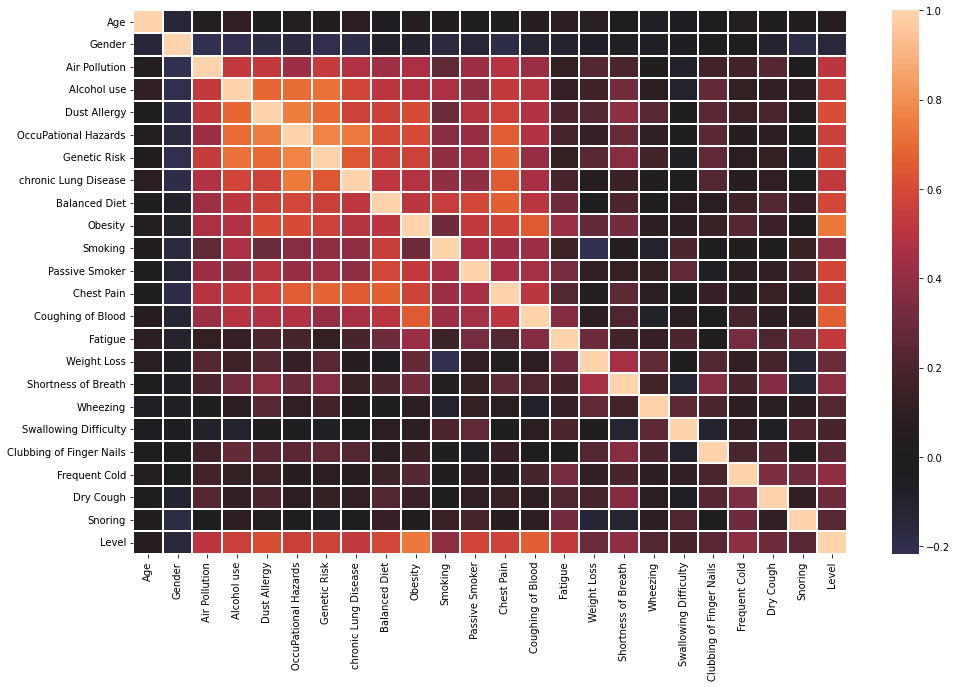

In [9]:
# method = pearson
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_corr.corr(method='kendall'), linewidths=0.1, center=0)

<AxesSubplot:>

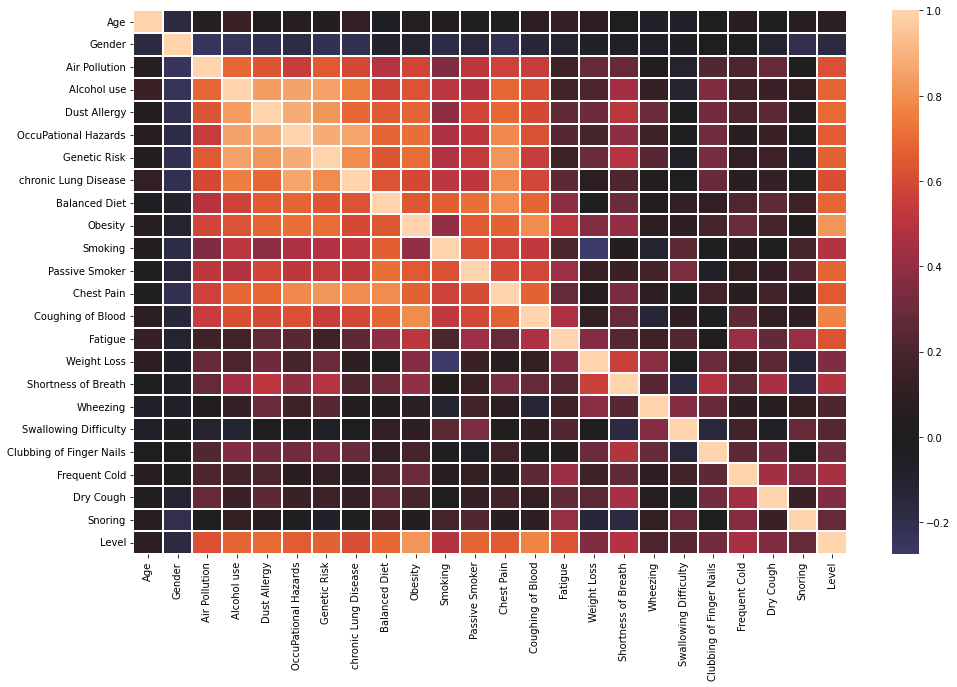

In [10]:
# method = pearson
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_corr.corr(method='spearman'), linewidths=0.1, center=0)

# Scenario 1
<a id="miss-data-1"></a>
## Handling Missing Data

Before deciding what kind of method we'll gonna use to handle the missing data, we need to know the statistic of the data first hand. I'm planning not to do any litwise or pairwise deletion, because I want to keep the data there. So what I'm gonna do later is to substitute the missing value.

In [11]:
# show the statistic of the dataset (count, mean, standard deviation, min, Q1, Q2=median, Q3, max)
df.describe(include='all')

Patient Id         Age      Gender  Air Pollution  Alcohol use  \
count        1000  997.000000  994.000000     991.000000   988.000000   
unique       1000         NaN         NaN            NaN          NaN   
top            P1         NaN         NaN            NaN          NaN   
freq            1         NaN         NaN            NaN          NaN   
mean          NaN   37.185557    1.400402       3.837538     4.577935   
std           NaN   12.003960    0.490227       2.032276     2.619582   
min           NaN   14.000000    1.000000       1.000000     1.000000   
25%           NaN   28.000000    1.000000       2.000000     2.000000   
50%           NaN   36.000000    1.000000       3.000000     5.000000   
75%           NaN   45.000000    2.000000       6.000000     7.000000   
max           NaN   73.000000    2.000000       8.000000     8.000000   

        Dust Allergy  OccuPational Hazards  Genetic Risk  \
count     993.000000            994.000000    994.000000   
unique           NaN                   NaN           NaN   
top              NaN                   NaN           NaN   
freq             NaN                   NaN           NaN   
mean        5.225579              4.837022      4.583501   
std         2.767079              2.107293      2.125842   
min         1.000000              1.000000      1.000000   
25%         4.000000              3.000000      2.250000   
50%         6.000000              5.000000      5.000000   
75%         7.000000              7.000000      7.000000   
max        66.000000              8.000000      7.000000   

        chronic Lung Disease  Balanced Diet     Obesity     Smoking  \
count            1000.000000     995.000000  992.000000  993.000000   
unique                   NaN            NaN         NaN         NaN   
top                      NaN            NaN         NaN         NaN   
freq                     NaN            NaN         NaN         NaN   
mean                4.380000       5.184925    4.476815    3.949648   
std                 1.848518      22.152435    2.127962    2.495052   
min                 1.000000       1.000000    1.000000    1.000000   
25%                 3.000000       2.000000    3.000000    2.000000   
50%                 4.000000       4.000000    4.000000    3.000000   
75%                 6.000000       7.000000    7.000000    7.000000   
max                 7.000000     700.000000    7.000000    8.000000   

        Passive Smoker  Chest Pain  Coughing of Blood     Fatigue  \
count       996.000000  992.000000         987.000000  995.000000   
unique             NaN         NaN                NaN         NaN   
top                NaN         NaN                NaN         NaN   
freq               NaN         NaN                NaN         NaN   
mean          4.413655    4.441532           4.867275    4.081407   
std           7.277940    2.278449           2.426947    7.271704   
min           1.000000    1.000000           1.000000    1.000000   
25%           2.000000    2.000000           3.000000    2.000000   
50%           4.000000    4.000000           4.000000    3.000000   
75%           7.000000    7.000000           7.000000    5.000000   
max         222.000000    9.000000           9.000000  222.000000   

        Weight Loss  Shortness of Breath    Wheezing  Swallowing Difficulty  \
count    995.000000           990.000000  994.000000             993.000000   
unique          NaN                  NaN         NaN                    NaN   
top             NaN                  NaN         NaN                    NaN   
freq            NaN                  NaN         NaN                    NaN   
mean       3.887437             4.240404    3.794769               3.749245   
std        2.287089             2.288756    2.051731               2.271528   
min        1.000000             1.000000    1.000000               1.000000   
25%        2.000000             2.000000    2.000000               2.000000   
50%        3.000

In [12]:
# mode of each column
pd.set_option('display.max_columns', None)
df.mode(axis=0).head(1)

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1  35.0     1.0            6.0          2.0           7.0   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                   7.0           7.0                   6.0            7.0   

   Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0      7.0      2.0             2.0         7.0                7.0      2.0   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0          2.0                  2.0       2.0                    1.0   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring Level  
0                       2.0            3.0        2.0      2.0  High

In [13]:
# how many counts of each values are in the columns
for col in df.columns:
    print(df[col].value_counts())
    print('================================')

P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: Patient Id, Length: 1000, dtype: int64
35.0    77
33.0    69
38.0    68
37.0    51
44.0    51
27.0    48
45.0    41
48.0    40
26.0    37
28.0    32
52.0    31
32.0    31
24.0    30
62.0    30
25.0    30
46.0    23
39.0    21
36.0    21
47.0    20
42.0    20
19.0    20
17.0    19
53.0    19
22.0    19
23.0    19
29.0    19
18.0    18
55.0    11
73.0    10
34.0    10
65.0    10
64.0    10
61.0    10
49.0    10
14.0     9
31.0     9
43.0     1
51.0     1
54.0     1
63.0     1
Name: Age, dtype: int64
1.0    596
2.0    398
Name: Gender, dtype: int64
6.0    322
2.0    198
3.0    172
1.0    141
4.0     89
7.0     30
5.0     20
8.0     19
Name: Air Pollution, dtype: int64
2.0    198
8.0    187
7.0    166
1.0    149
5.0     89
3.0     79
6.0     79
4.0     41
Name: Alcohol use, dtype: int64
7.0     402
4.0     132
5.0     110
6.0     109
3.0      99
2.0      70
1.0      60
8.0   

In [14]:
# Let's check again how many missing value we have on each column
df.isna().sum()

Patient Id                   0
Age                          3
Gender                       6
Air Pollution                9
Alcohol use                 12
Dust Allergy                 7
OccuPational Hazards         6
Genetic Risk                 6
chronic Lung Disease         0
Balanced Diet                5
Obesity                      8
Smoking                      7
Passive Smoker               4
Chest Pain                   8
Coughing of Blood           13
Fatigue                      5
Weight Loss                  5
Shortness of Breath         10
Wheezing                     6
Swallowing Difficulty        7
Clubbing of Finger Nails     4
Frequent Cold                3
Dry Cough                    0
Snoring                      0
Level                        0
dtype: int64

From the correlation heatmap we can see that column Age and Gender has the least correlation (close to zero) with other columns. We'll substitute the missing values on these columns with their median, not their mean. The reason why is because those 2 columns consist of discrete value, while their mean is a continuous value.

In [15]:
# don't forget to make a copy of the dataset
df_1 = df.copy()

# Level column encoding
df_1['Level'] = df_1['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# replace missing value in column Age & Gender with their median
df_1['Age'] = df_1['Age'].fillna(df_1['Age'].median())
df_1['Gender'] = df_1['Gender'].fillna(df_1['Gender'].median())

We will do regression-based imputation for the other missing values on the rest of the column.

Open the code below to see how the process to do the imputation by using linear regression

In [16]:
def imp_miss_data(df, labels_drop):
    miss_columns = df.columns[df.isna().any()].tolist()
    
    df_lr = df.copy()
    df_lr = df_lr.drop(labels=labels_drop, axis=1)
    all_col = df_lr.columns.tolist()

    for col in miss_columns:
        train_df = df_lr.copy()
        test_df = df_lr[df_lr[col].isna() == True]
        train_df = train_df.drop(test_df.index.values.tolist())

#         temporary change the nan value of other column to 0
        test_df = test_df.fillna(0.0)
        train_df =train_df.fillna(0.0)
    
        y_train = train_df[col]
        x_train = train_df.drop(labels=[col], axis=1)
    
#         create linear regression model
        model = LinearRegression()
        model.fit(x_train, y_train)
    
#         drop the column where we want to do the prediction on missing values
        test_df = test_df.drop(labels=[col], axis=1)
    
#        predict the missing value
        pred = model.predict(test_df)
        test_df[col] = pred
    
        df_lr = train_df.append(test_df)
    
#         return 0.0 value to nan
        df_lr[all_col] = df_lr[all_col].replace(0, np.nan)
    
#         sort the index
        df_lr = df_lr.sort_index()
    
#     don't forget to return df_lr to df_1
    df[miss_columns] = df_lr[miss_columns]
    return df

In [17]:
df_1 = imp_miss_data(df_1, ['Patient Id'])
# let's call the dataframe to see the new dataframe
df_1

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1  33.0     1.0            2.0          4.0           5.0   
1          P10  17.0     1.0            3.0          1.0           5.0   
2         P100  35.0     1.0            4.0          5.0           6.0   
3        P1000  37.0     1.0            7.0          7.0           7.0   
4         P101  46.0     1.0            6.0          8.0           7.0   
..         ...   ...     ...            ...          ...           ...   
995       P995  44.0     1.0            6.0          7.0           7.0   
996       P996  37.0     2.0            6.0          8.0           7.0   
997       P997  25.0     2.0            4.0          5.0           6.0   
998       P998  18.0     2.0            6.0          8.0           7.0   
999       P999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4.0           3.0                     2            2.0   
1                     3.0           4.0                     2            2.0   
2                     5.0           5.0                     4            6.0   
3                     7.0           6.0                     7            7.0   
4                     7.0           7.0                     6            7.0   
..                    ...           ...                   ...            ...   
995                   7.0           7.0                     6            7.0   
996                   7.0           7.0                     6            7.0   
997                   5.0           5.0                     4            6.0   
998                   7.0           7.0                     6            7.0   
999                   5.0           5.0                     4            6.0   

     Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4.0      3.0             2.0         2.0                4.0      3.0   
1        2.0      2.0             4.0         2.0                3.0      1.0   
2        7.0      2.0             3.0         4.0                8.0      8.0   
3        7.0      7.0             7.0         7.0                8.0      4.0   
4        7.0      8.0             7.0         7.0                9.0      3.0   
..       ...      ...             ...         ...                ...      ...   
995      7.0      7.0             8.0         7.0                7.0      5.0   
996      7.0      7.0             8.0         7.0                7.0      9.0   
997      7.0      2.0             3.0         4.0                8.0      8.0   
998      7.0      8.0             7.0         7.0                9.0      3.0   
999      7.0      2.0             3.0         4.0                8.0      8.0   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0       4.000000                  2.0       2.0                    3.0   
1       3.000000                  7.0       8.0                    6.0   
2       7.000000                  9.0       2.0                    1.0   
3       2.000000                  3.0       1.0                    4.0   
4       3.098951                  4.0       1.0                    4.0   
..           ...                  ...       ...                    ...   
995     3.000000                  2.0       7.0                    8.0   
996     6.000000                  5.0       7.0                    2.0   
997     7.000000                  9.0       2.0                    1.0   
998     2.000000                  4.0       1.0                    4.0   
999     7.000000                  9.0       2.0                    1.0   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                         1.0            2.0          3        4      1  
1                         2.0            1.0          7        2      2  
2                         4.0            6.0          7        2      

In [18]:
# you can check again if there are still missing values in the dataframe
df_1.isna().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [19]:
# there are some decimals data, let's change it to integer
df_1[df_1.select_dtypes(exclude=['object']).columns.tolist()] = df_1[df_1.select_dtypes(exclude=['object']).columns.tolist()].apply(np.ceil)

df_1

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1  33.0     1.0            2.0          4.0           5.0   
1          P10  17.0     1.0            3.0          1.0           5.0   
2         P100  35.0     1.0            4.0          5.0           6.0   
3        P1000  37.0     1.0            7.0          7.0           7.0   
4         P101  46.0     1.0            6.0          8.0           7.0   
..         ...   ...     ...            ...          ...           ...   
995       P995  44.0     1.0            6.0          7.0           7.0   
996       P996  37.0     2.0            6.0          8.0           7.0   
997       P997  25.0     2.0            4.0          5.0           6.0   
998       P998  18.0     2.0            6.0          8.0           7.0   
999       P999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4.0           3.0                   2.0            2.0   
1                     3.0           4.0                   2.0            2.0   
2                     5.0           5.0                   4.0            6.0   
3                     7.0           6.0                   7.0            7.0   
4                     7.0           7.0                   6.0            7.0   
..                    ...           ...                   ...            ...   
995                   7.0           7.0                   6.0            7.0   
996                   7.0           7.0                   6.0            7.0   
997                   5.0           5.0                   4.0            6.0   
998                   7.0           7.0                   6.0            7.0   
999                   5.0           5.0                   4.0            6.0   

     Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4.0      3.0             2.0         2.0                4.0      3.0   
1        2.0      2.0             4.0         2.0                3.0      1.0   
2        7.0      2.0             3.0         4.0                8.0      8.0   
3        7.0      7.0             7.0         7.0                8.0      4.0   
4        7.0      8.0             7.0         7.0                9.0      3.0   
..       ...      ...             ...         ...                ...      ...   
995      7.0      7.0             8.0         7.0                7.0      5.0   
996      7.0      7.0             8.0         7.0                7.0      9.0   
997      7.0      2.0             3.0         4.0                8.0      8.0   
998      7.0      8.0             7.0         7.0                9.0      3.0   
999      7.0      2.0             3.0         4.0                8.0      8.0   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4.0                  2.0       2.0                    3.0   
1            3.0                  7.0       8.0                    6.0   
2            7.0                  9.0       2.0                    1.0   
3            2.0                  3.0       1.0                    4.0   
4            4.0                  4.0       1.0                    4.0   
..           ...                  ...       ...                    ...   
995          3.0                  2.0       7.0                    8.0   
996          6.0                  5.0       7.0                    2.0   
997          7.0                  9.0       2.0                    1.0   
998          2.0                  4.0       1.0                    4.0   
999          7.0                  9.0       2.0                    1.0   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                         1.0            2.0        3.0      4.0    1.0  
1                         2.0            1.0        7.0      2.0    2.0  
2                         4.0            6.0        7.0      2.0    3.

<a id="outliers-1"></a>
## Handling Outliers

The first step we have to do is to see the current data distribution using boxplot. Here we will exclude Patient Id. After we will delete row that have outliers and plot it again on a new boxplot.

Below here is the code to make the boxplot.

In [20]:
def boxplot_fig(df, box_title):
    fig = go.Figure()

    for var in df[df.select_dtypes(exclude=['object']).columns.tolist()]:
        fig.add_trace(go.Box(y=df[var],
                             name=var,
                             marker_color=["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])][0]
        ))
    
    fig.update_layout(yaxis_title='Value',
                      xaxis_title='Variable',
                      title=box_title,
                      showlegend=False
    )
    fig.show()

In [21]:
boxplot_fig(df, 'Boxplot using original dataframe')

In [22]:
boxplot_fig(df_1, 'Boxplot after imputation')

In [23]:
df_2 = df_1.copy()

df_2 = df_2[(np.abs(stats.zscore(df_2.loc[:, 'Gender':])) < 3).all(axis=1)]
boxplot_fig(df_2, 'Boxplot after imputation & without outliers')

In [24]:
df_2

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1  33.0     1.0            2.0          4.0           5.0   
1          P10  17.0     1.0            3.0          1.0           5.0   
2         P100  35.0     1.0            4.0          5.0           6.0   
3        P1000  37.0     1.0            7.0          7.0           7.0   
4         P101  46.0     1.0            6.0          8.0           7.0   
..         ...   ...     ...            ...          ...           ...   
995       P995  44.0     1.0            6.0          7.0           7.0   
996       P996  37.0     2.0            6.0          8.0           7.0   
997       P997  25.0     2.0            4.0          5.0           6.0   
998       P998  18.0     2.0            6.0          8.0           7.0   
999       P999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4.0           3.0                   2.0            2.0   
1                     3.0           4.0                   2.0            2.0   
2                     5.0           5.0                   4.0            6.0   
3                     7.0           6.0                   7.0            7.0   
4                     7.0           7.0                   6.0            7.0   
..                    ...           ...                   ...            ...   
995                   7.0           7.0                   6.0            7.0   
996                   7.0           7.0                   6.0            7.0   
997                   5.0           5.0                   4.0            6.0   
998                   7.0           7.0                   6.0            7.0   
999                   5.0           5.0                   4.0            6.0   

     Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4.0      3.0             2.0         2.0                4.0      3.0   
1        2.0      2.0             4.0         2.0                3.0      1.0   
2        7.0      2.0             3.0         4.0                8.0      8.0   
3        7.0      7.0             7.0         7.0                8.0      4.0   
4        7.0      8.0             7.0         7.0                9.0      3.0   
..       ...      ...             ...         ...                ...      ...   
995      7.0      7.0             8.0         7.0                7.0      5.0   
996      7.0      7.0             8.0         7.0                7.0      9.0   
997      7.0      2.0             3.0         4.0                8.0      8.0   
998      7.0      8.0             7.0         7.0                9.0      3.0   
999      7.0      2.0             3.0         4.0                8.0      8.0   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4.0                  2.0       2.0                    3.0   
1            3.0                  7.0       8.0                    6.0   
2            7.0                  9.0       2.0                    1.0   
3            2.0                  3.0       1.0                    4.0   
4            4.0                  4.0       1.0                    4.0   
..           ...                  ...       ...                    ...   
995          3.0                  2.0       7.0                    8.0   
996          6.0                  5.0       7.0                    2.0   
997          7.0                  9.0       2.0                    1.0   
998          2.0                  4.0       1.0                    4.0   
999          7.0                  9.0       2.0                    1.0   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                         1.0            2.0        3.0      4.0    1.0  
1                         2.0            1.0        7.0      2.0    2.0  
2                         4.0            6.0        7.0      2.0    3.

# Scenario 2
<a id="outliers-2"></a>
## Handling Outliers

In [25]:
boxplot_fig(df, 'Boxplot using original dataframe')

In [26]:
# make a copy of the original dataframe
df_3 = df.copy()

# Level column encoding
df_3['Level'] = df_3['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# change nan value to 0
df_3 = df_3.fillna(0)

# remove the outliers
df_3 = df_3[(np.abs(stats.zscore(df_3.loc[:, 'Gender':])) < 3).all(axis=1)]

# return 0 value to nan
df_3 = df_3.replace(0, np.nan)

# plot the boxplot
boxplot_fig(df_3, 'Boxplot without outliers')

<a id="miss-data-2"></a>
## Handling Missing Data

In [27]:
df_4 = df_3.copy()

# replace missing value in column Age & Gender with their median
df_4['Age'] = df_4['Age'].fillna(df_4['Age'].median())
df_4['Gender'] = df_4['Gender'].fillna(df_4['Gender'].median())

# replace the other missing value using linear regression
df_4 = imp_miss_data(df_4, ['Patient Id'])

# there are some decimals data, let's change it to integer
df_4[df_4.select_dtypes(exclude=['object']).columns.tolist()] = df_4[df_4.select_dtypes(exclude=['object']).columns.tolist()].apply(np.ceil)

df_4

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1  33.0     1.0            2.0          4.0           5.0   
1          P10  17.0     1.0            3.0          1.0           5.0   
2         P100  35.0     1.0            4.0          5.0           6.0   
3        P1000  37.0     1.0            7.0          7.0           7.0   
4         P101  46.0     1.0            6.0          8.0           7.0   
..         ...   ...     ...            ...          ...           ...   
995       P995  44.0     1.0            6.0          7.0           7.0   
996       P996  37.0     2.0            6.0          8.0           7.0   
997       P997  25.0     2.0            4.0          5.0           6.0   
998       P998  18.0     2.0            6.0          8.0           7.0   
999       P999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4.0           3.0                   2.0            2.0   
1                     3.0           4.0                   2.0            2.0   
2                     5.0           5.0                   4.0            6.0   
3                     7.0           6.0                   7.0            7.0   
4                     7.0           7.0                   6.0            7.0   
..                    ...           ...                   ...            ...   
995                   7.0           7.0                   6.0            7.0   
996                   7.0           7.0                   6.0            7.0   
997                   5.0           5.0                   4.0            6.0   
998                   7.0           7.0                   6.0            7.0   
999                   5.0           5.0                   4.0            6.0   

     Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4.0      3.0             2.0         2.0                4.0      3.0   
1        2.0      2.0             4.0         2.0                3.0      1.0   
2        7.0      2.0             3.0         4.0                8.0      8.0   
3        7.0      7.0             7.0         7.0                8.0      4.0   
4        7.0      8.0             7.0         7.0                9.0      3.0   
..       ...      ...             ...         ...                ...      ...   
995      7.0      7.0             8.0         7.0                7.0      5.0   
996      7.0      7.0             8.0         7.0                7.0      9.0   
997      7.0      2.0             3.0         4.0                8.0      8.0   
998      7.0      8.0             7.0         7.0                9.0      3.0   
999      7.0      2.0             3.0         4.0                8.0      8.0   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4.0                  2.0       2.0                    3.0   
1            3.0                  7.0       8.0                    6.0   
2            7.0                  9.0       2.0                    1.0   
3            2.0                  3.0       1.0                    4.0   
4            3.0                  4.0       1.0                    4.0   
..           ...                  ...       ...                    ...   
995          3.0                  2.0       7.0                    8.0   
996          6.0                  5.0       7.0                    2.0   
997          7.0                  9.0       2.0                    1.0   
998          2.0                  4.0       1.0                    4.0   
999          7.0                  9.0       2.0                    1.0   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                         1.0            2.0        3.0      4.0    1.0  
1                         2.0            1.0        7.0      2.0    2.0  
2                         4.0            6.0        7.0      2.0    3.

In [28]:
boxplot_fig(df_4, 'Boxplot without outliers & after imputation')

# Version 2 of Scenario 2

## Handling Outliers

In this version instead of removing all outliers I'll replace most of the outliers and remove the others.

In [29]:
df_5 = df.copy()

# Level column encoding
df_5['Level'] = df_5['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

boxplot_fig(df_5, 'Boxplot using original dataframe')

Replace the outliers value as follows:
- 66 -> 6
- 700 -> 7
- 222 -> 2
- 20 -> 2
- 11 -> 1

And delete the other outliers

In [30]:
# replace outliers
df_5 = df_5.replace({66: 6,
                     700: 7,
                     222: 2,
                     20: 2,
                     11: 1
                    })

# change nan value to 0 temporary
df_5 = df_5.fillna(0)

# remove other outliers
df_5 = df_5[(np.abs(stats.zscore(df_5.loc[:, 'Gender':])) < 3.1).all(axis=1)]

# return 0 value to nan again
df_5 = df_5.replace(0, np.nan)

# # plot the boxplot again
boxplot_fig(df_5, 'Boxplot without outliers')

In [31]:
# check how many missing value we have
df_5.isna().sum()

Patient Id                   0
Age                          3
Gender                       6
Air Pollution                9
Alcohol use                 12
Dust Allergy                 7
OccuPational Hazards         6
Genetic Risk                 6
chronic Lung Disease         0
Balanced Diet                5
Obesity                      8
Smoking                      7
Passive Smoker               4
Chest Pain                   8
Coughing of Blood           13
Fatigue                      5
Weight Loss                  5
Shortness of Breath         10
Wheezing                     6
Swallowing Difficulty        7
Clubbing of Finger Nails     4
Frequent Cold                3
Dry Cough                    0
Snoring                      0
Level                        0
dtype: int64

<a id="miss-data-2"></a>
## Handling Missing Data

In [32]:
df_6 = df_5.copy()

# replace missing value in column Age & Gender with their median
df_6['Age'] = df_6['Age'].fillna(df_6['Age'].median())
df_6['Gender'] = df_6['Gender'].fillna(df_6['Gender'].median())

# replace the other missing value using linear regression
df_6 = imp_miss_data(df_6, ['Patient Id'])

# there are some decimals data, let's change it to integer
df_6[df_6.select_dtypes(exclude=['object']).columns.tolist()] = df_6[df_6.select_dtypes(exclude=['object']).columns.tolist()].apply(np.ceil)

df_6

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1  33.0     1.0            2.0          4.0           5.0   
1          P10  17.0     1.0            3.0          1.0           5.0   
2         P100  35.0     1.0            4.0          5.0           6.0   
3        P1000  37.0     1.0            7.0          7.0           7.0   
4         P101  46.0     1.0            6.0          8.0           7.0   
..         ...   ...     ...            ...          ...           ...   
995       P995  44.0     1.0            6.0          7.0           7.0   
996       P996  37.0     2.0            6.0          8.0           7.0   
997       P997  25.0     2.0            4.0          5.0           6.0   
998       P998  18.0     2.0            6.0          8.0           7.0   
999       P999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4.0           3.0                   2.0            2.0   
1                     3.0           4.0                   2.0            2.0   
2                     5.0           5.0                   4.0            6.0   
3                     7.0           6.0                   7.0            7.0   
4                     7.0           7.0                   6.0            7.0   
..                    ...           ...                   ...            ...   
995                   7.0           7.0                   6.0            7.0   
996                   7.0           7.0                   6.0            7.0   
997                   5.0           5.0                   4.0            6.0   
998                   7.0           7.0                   6.0            7.0   
999                   5.0           5.0                   4.0            6.0   

     Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4.0      3.0             2.0         2.0                4.0      3.0   
1        2.0      2.0             4.0         2.0                3.0      1.0   
2        7.0      2.0             3.0         4.0                8.0      8.0   
3        7.0      7.0             7.0         7.0                8.0      4.0   
4        7.0      8.0             7.0         7.0                9.0      3.0   
..       ...      ...             ...         ...                ...      ...   
995      7.0      7.0             8.0         7.0                7.0      5.0   
996      7.0      7.0             8.0         7.0                7.0      9.0   
997      7.0      2.0             3.0         4.0                8.0      8.0   
998      7.0      8.0             7.0         7.0                9.0      3.0   
999      7.0      2.0             3.0         4.0                8.0      8.0   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4.0                  2.0       2.0                    3.0   
1            3.0                  7.0       8.0                    6.0   
2            7.0                  9.0       2.0                    1.0   
3            2.0                  3.0       1.0                    4.0   
4            3.0                  4.0       1.0                    4.0   
..           ...                  ...       ...                    ...   
995          3.0                  2.0       7.0                    8.0   
996          6.0                  5.0       7.0                    2.0   
997          7.0                  9.0       2.0                    1.0   
998          2.0                  4.0       1.0                    4.0   
999          7.0                  9.0       2.0                    1.0   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                         1.0            2.0        3.0      4.0    1.0  
1                         2.0            1.0        7.0      2.0    2.0  
2                         4.0            6.0        7.0      2.0    3.

In [33]:
boxplot_fig(df_6, 'Boxplot without outliers & after imputation')

In [34]:
df_6

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1  33.0     1.0            2.0          4.0           5.0   
1          P10  17.0     1.0            3.0          1.0           5.0   
2         P100  35.0     1.0            4.0          5.0           6.0   
3        P1000  37.0     1.0            7.0          7.0           7.0   
4         P101  46.0     1.0            6.0          8.0           7.0   
..         ...   ...     ...            ...          ...           ...   
995       P995  44.0     1.0            6.0          7.0           7.0   
996       P996  37.0     2.0            6.0          8.0           7.0   
997       P997  25.0     2.0            4.0          5.0           6.0   
998       P998  18.0     2.0            6.0          8.0           7.0   
999       P999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4.0           3.0                   2.0            2.0   
1                     3.0           4.0                   2.0            2.0   
2                     5.0           5.0                   4.0            6.0   
3                     7.0           6.0                   7.0            7.0   
4                     7.0           7.0                   6.0            7.0   
..                    ...           ...                   ...            ...   
995                   7.0           7.0                   6.0            7.0   
996                   7.0           7.0                   6.0            7.0   
997                   5.0           5.0                   4.0            6.0   
998                   7.0           7.0                   6.0            7.0   
999                   5.0           5.0                   4.0            6.0   

     Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4.0      3.0             2.0         2.0                4.0      3.0   
1        2.0      2.0             4.0         2.0                3.0      1.0   
2        7.0      2.0             3.0         4.0                8.0      8.0   
3        7.0      7.0             7.0         7.0                8.0      4.0   
4        7.0      8.0             7.0         7.0                9.0      3.0   
..       ...      ...             ...         ...                ...      ...   
995      7.0      7.0             8.0         7.0                7.0      5.0   
996      7.0      7.0             8.0         7.0                7.0      9.0   
997      7.0      2.0             3.0         4.0                8.0      8.0   
998      7.0      8.0             7.0         7.0                9.0      3.0   
999      7.0      2.0             3.0         4.0                8.0      8.0   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4.0                  2.0       2.0                    3.0   
1            3.0                  7.0       8.0                    6.0   
2            7.0                  9.0       2.0                    1.0   
3            2.0                  3.0       1.0                    4.0   
4            3.0                  4.0       1.0                    4.0   
..           ...                  ...       ...                    ...   
995          3.0                  2.0       7.0                    8.0   
996          6.0                  5.0       7.0                    2.0   
997          7.0                  9.0       2.0                    1.0   
998          2.0                  4.0       1.0                    4.0   
999          7.0                  9.0       2.0                    1.0   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                         1.0            2.0        3.0      4.0    1.0  
1                         2.0            1.0        7.0      2.0    2.0  
2                         4.0            6.0        7.0      2.0    3.